#### Importing the libraries

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

#### Reading the dataframe

In [3]:
df = pd.read_csv('D:\\SEM 4\\Unsupervised Machine Learning Lab\\Mall_Customers.csv')

In [4]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [5]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [8]:
df.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

#### k-means: k-value

- Spending score vs Annual Income

In [11]:
x = df.loc[:, ['Spending Score (1-100)', 'Annual Income (k$)']].values

In [12]:
x.shape

(200, 2)

In [13]:
x_data  = pd.DataFrame(x)
x_data.head()

,0,1
0,39,15
1,81,15
2,6,16
3,77,16
4,40,17


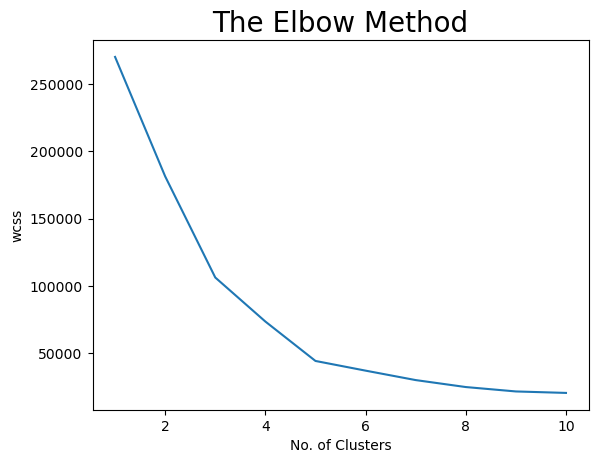

In [16]:
wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    km.fit(x)
    wcss.append(km.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')
plt.show()

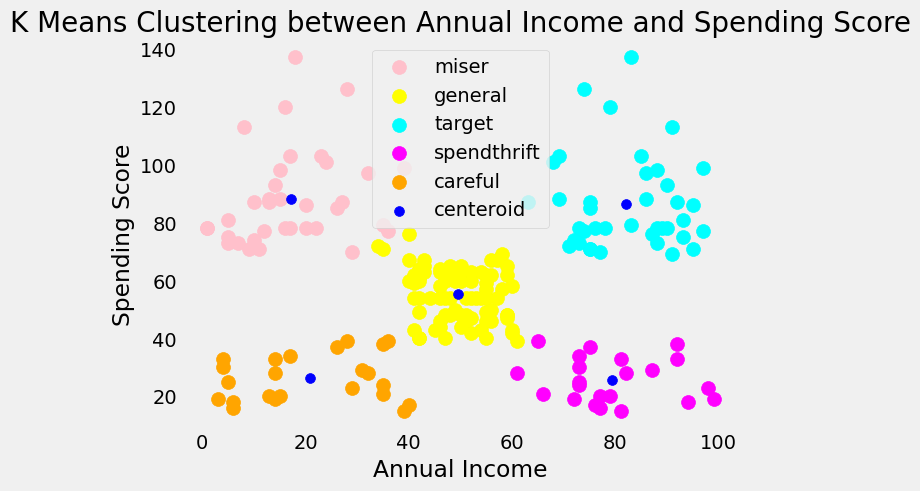

In [17]:
plt.style.use('fivethirtyeight')

km = KMeans(n_clusters = 5, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_means = km.fit_predict(x)

plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s = 100, c = 'pink', label = 'miser')
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s = 100, c = 'yellow', label = 'general')
plt.scatter(x[y_means == 2, 0], x[y_means == 2, 1], s = 100, c = 'cyan', label = 'target')
plt.scatter(x[y_means == 3, 0], x[y_means == 3, 1], s = 100, c = 'magenta', label = 'spendthrift')
plt.scatter(x[y_means == 4, 0], x[y_means == 4, 1], s = 100, c = 'orange', label = 'careful')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], s = 50, c = 'blue' , label = 'centeroid')

plt.style.use('fivethirtyeight')
plt.title('K Means Clustering between Annual Income and Spending Score', fontsize = 20)
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.grid()
plt.show()

- Annual Income vs Spending score

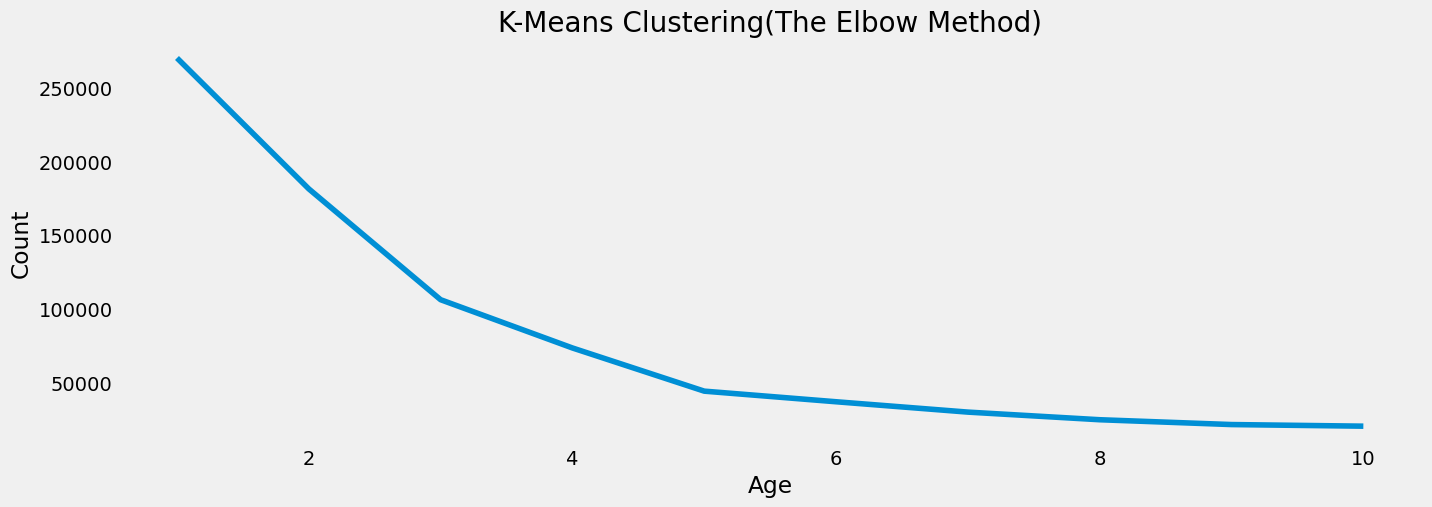

In [18]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

plt.rcParams['figure.figsize'] = (15, 5)
plt.plot(range(1, 11), wcss)
plt.title('K-Means Clustering(The Elbow Method)', fontsize = 20)
plt.xlabel('Age')
plt.ylabel('Count')
plt.grid()
plt.show()

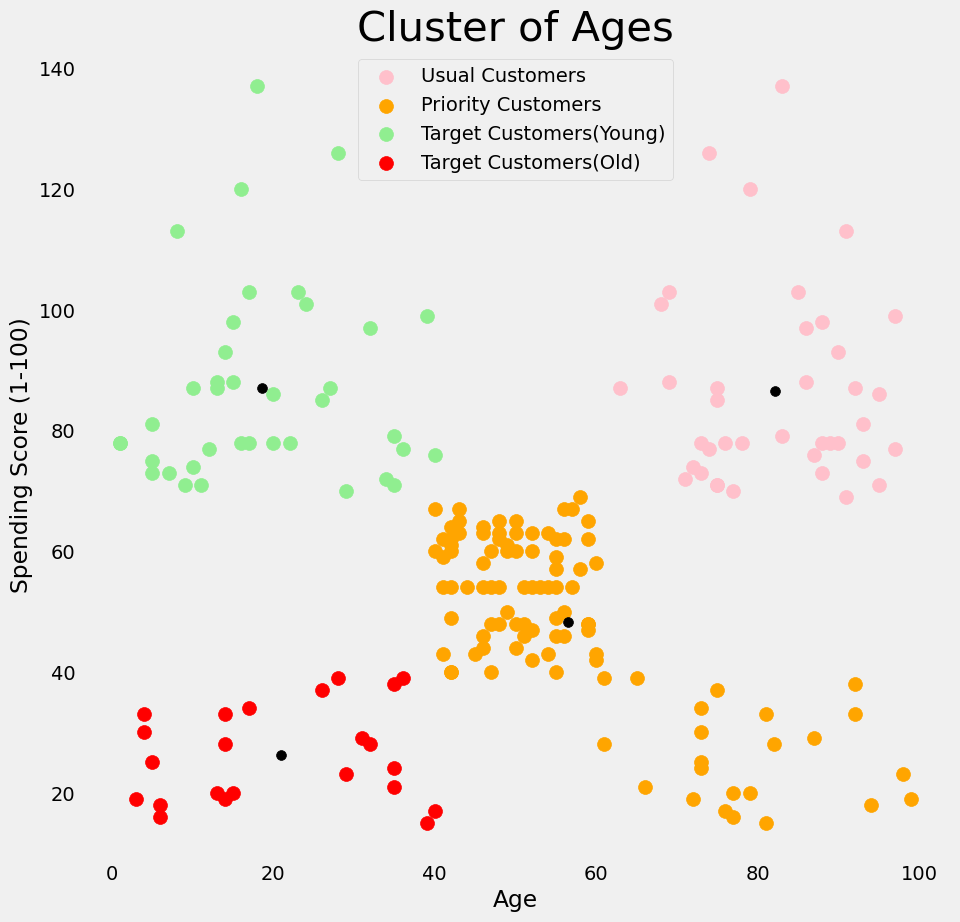

In [19]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
ymeans = kmeans.fit_predict(x)

plt.rcParams['figure.figsize'] = (10, 10)
plt.title('Cluster of Ages', fontsize = 30)

plt.scatter(x[ymeans == 0, 0], x[ymeans == 0, 1], s = 100, c = 'pink', label = 'Usual Customers' )
plt.scatter(x[ymeans == 1, 0], x[ymeans == 1, 1], s = 100, c = 'orange', label = 'Priority Customers')
plt.scatter(x[ymeans == 2, 0], x[ymeans == 2, 1], s = 100, c = 'lightgreen', label = 'Target Customers(Young)')
plt.scatter(x[ymeans == 3, 0], x[ymeans == 3, 1], s = 100, c = 'red', label = 'Target Customers(Old)')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 50, c = 'black')

plt.style.use('fivethirtyeight')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.grid()
plt.show()

- Age vs Spending Score

In [38]:
x_age_spending = df.loc[:, ['Age', 'Spending Score (1-100)']].values

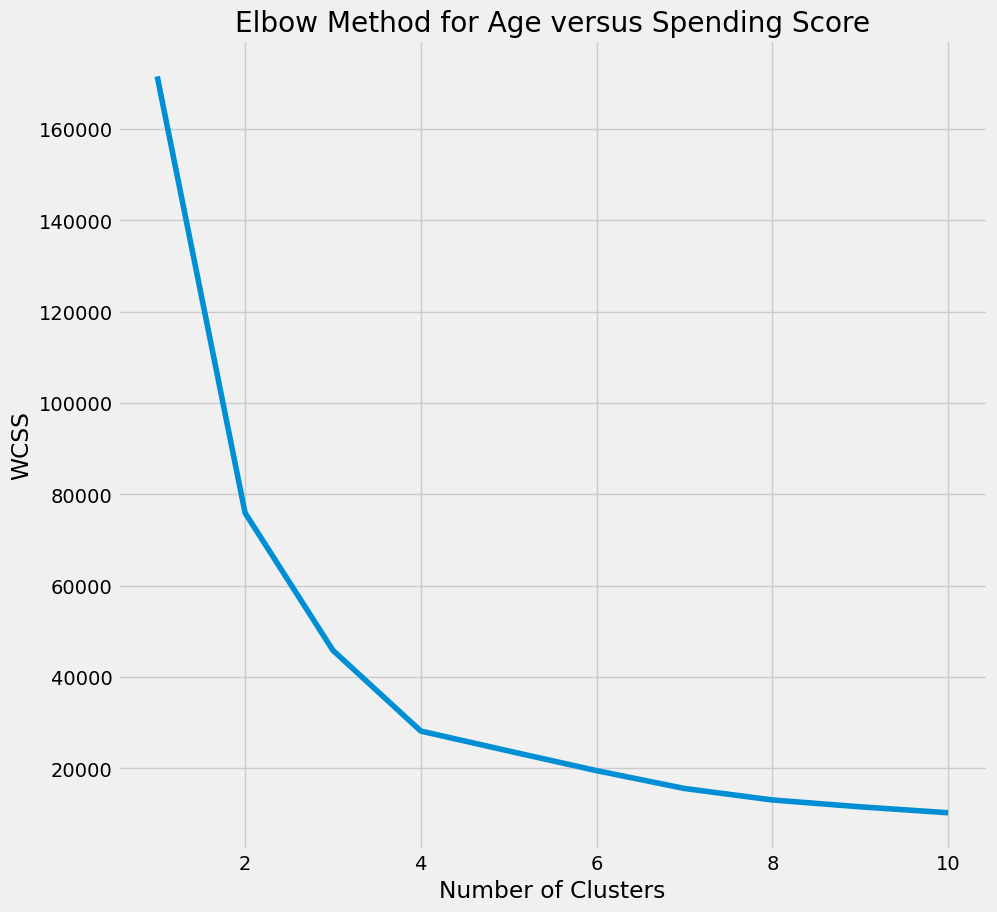

In [39]:
# Elbow method to determine the optimal number of clusters for age versus spending score
wcss_age_spending = []
for i in range(1, 11):
    kmeans_age_spending = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans_age_spending.fit(x_age_spending)
    wcss_age_spending.append(kmeans_age_spending.inertia_)
plt.plot(range(1, 11), wcss_age_spending)
plt.title('Elbow Method for Age versus Spending Score')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [40]:
# Applying KMeans clustering with the optimal number of clusters based on the elbow method
kmeans_optimal_age_spending = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=0)
ymeans_age_spending = kmeans_optimal_age_spending.fit_predict(x_age_spending)

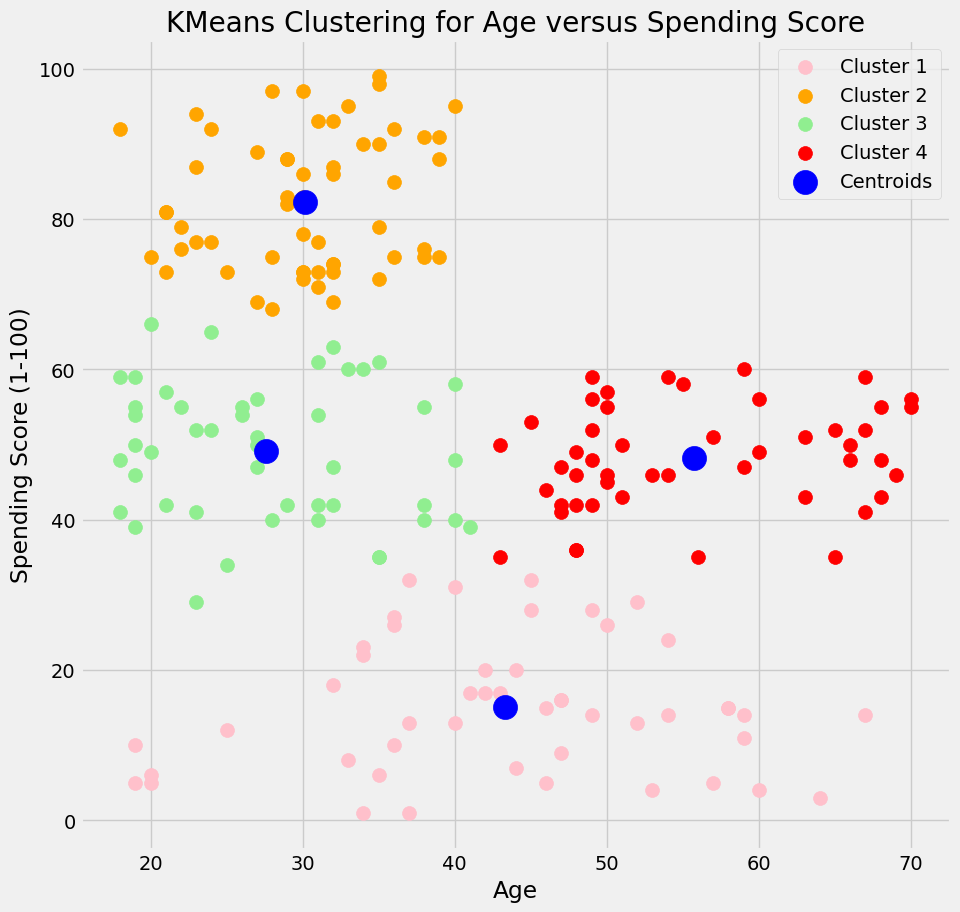

In [41]:
# Visualizing the clustering for age versus spending score
plt.scatter(x_age_spending[ymeans_age_spending == 0, 0], x_age_spending[ymeans_age_spending == 0, 1], s=100, c='pink', label='Cluster 1')
plt.scatter(x_age_spending[ymeans_age_spending == 1, 0], x_age_spending[ymeans_age_spending == 1, 1], s=100, c='orange', label='Cluster 2')
plt.scatter(x_age_spending[ymeans_age_spending == 2, 0], x_age_spending[ymeans_age_spending == 2, 1], s=100, c='lightgreen', label='Cluster 3')
plt.scatter(x_age_spending[ymeans_age_spending == 3, 0], x_age_spending[ymeans_age_spending == 3, 1], s=100, c='red', label='Cluster 4')
plt.scatter(kmeans_optimal_age_spending.cluster_centers_[:, 0], kmeans_optimal_age_spending.cluster_centers_[:, 1], s=300, c='blue', label='Centroids')
plt.title('KMeans Clustering for Age versus Spending Score')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.grid(True)
plt.show()

#### Silhouette score analysis

- Spending score vs Annual Income

In [20]:
# Define the range of cluster numbers to analyze
range_n_clusters = [2, 3, 4, 5, 6]

For n_clusters = 2 The average silhouette_score is : 0.2968969162503008
For n_clusters = 3 The average silhouette_score is : 0.46761358158775435
For n_clusters = 4 The average silhouette_score is : 0.4931963109249047
For n_clusters = 5 The average silhouette_score is : 0.553931997444648
For n_clusters = 6 The average silhouette_score is : 0.5376203956398481


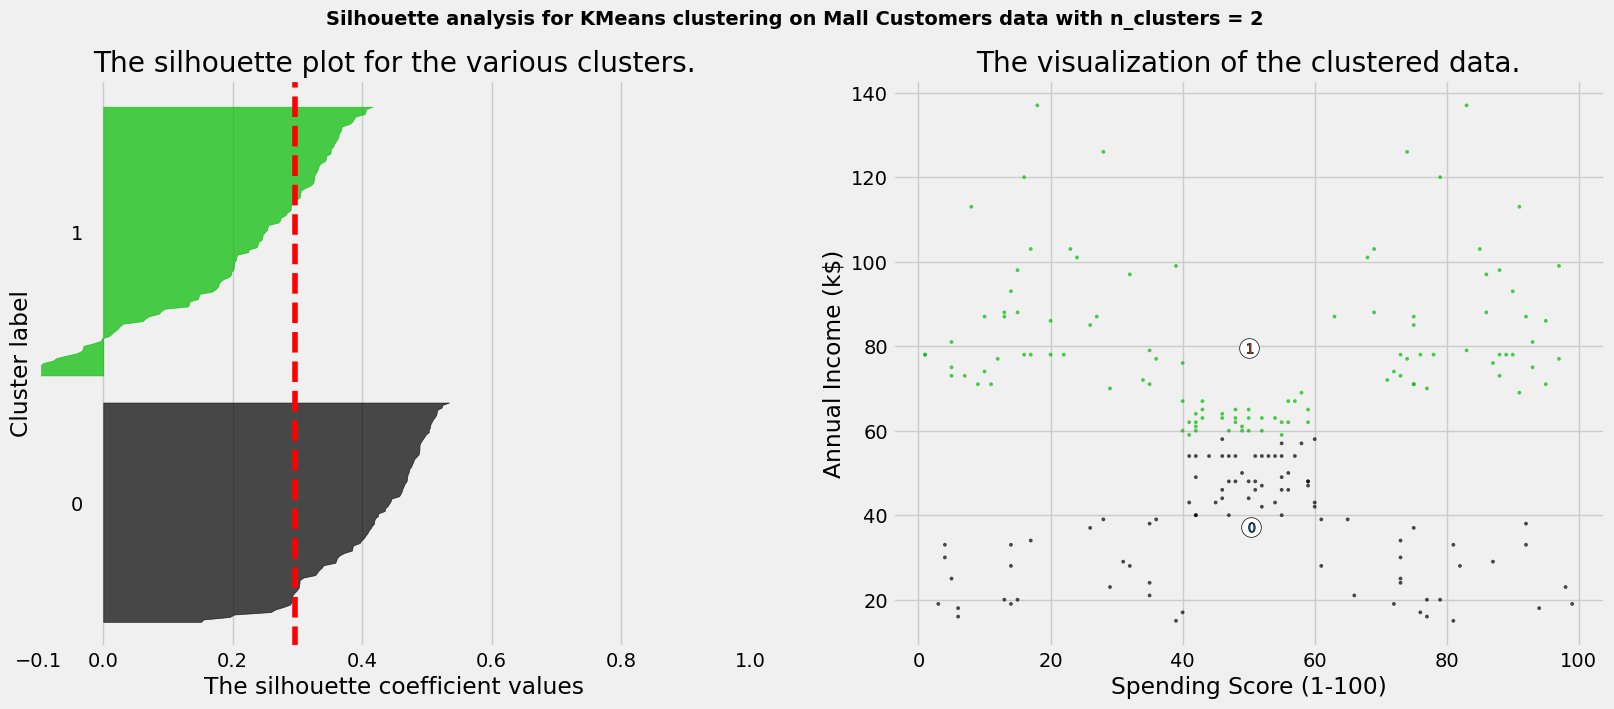

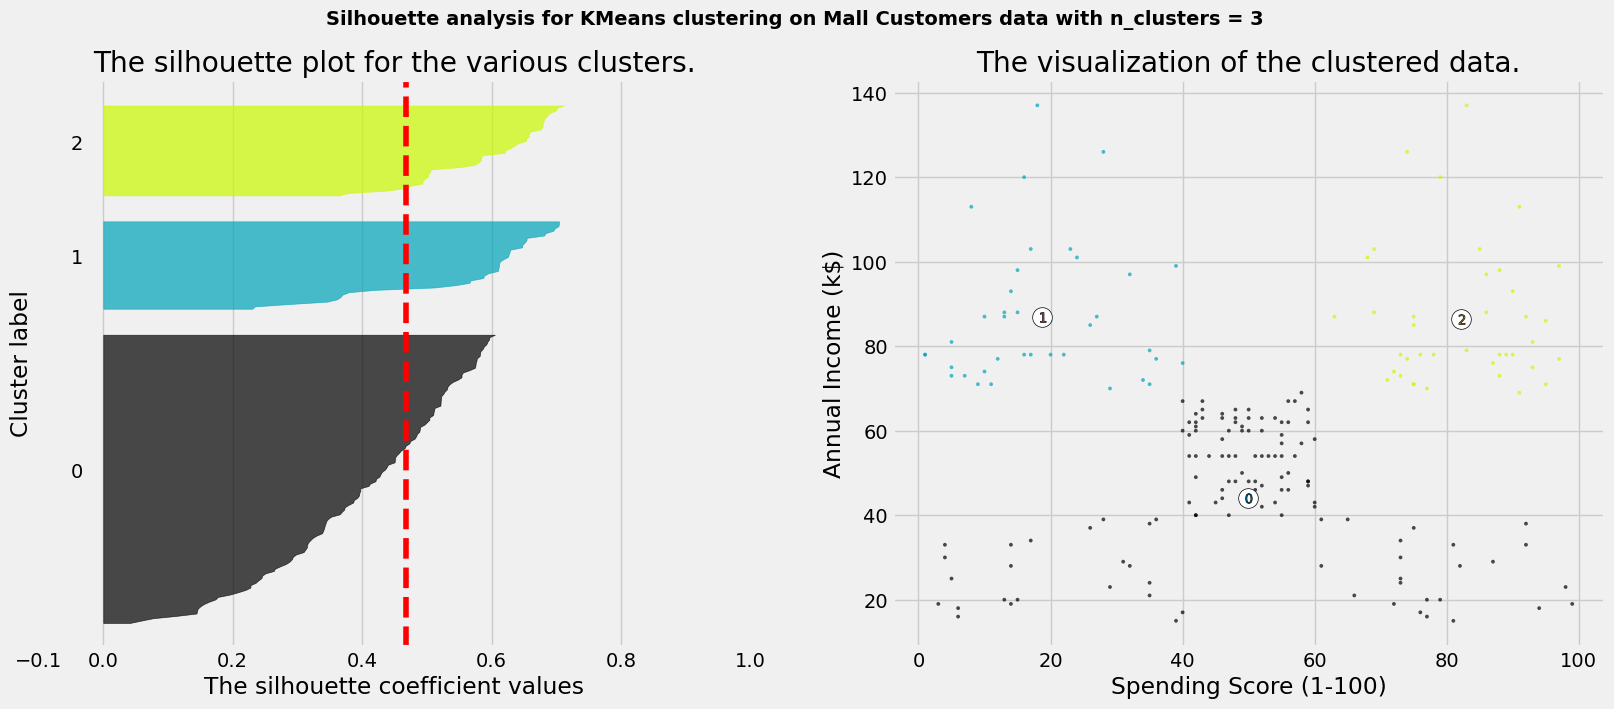

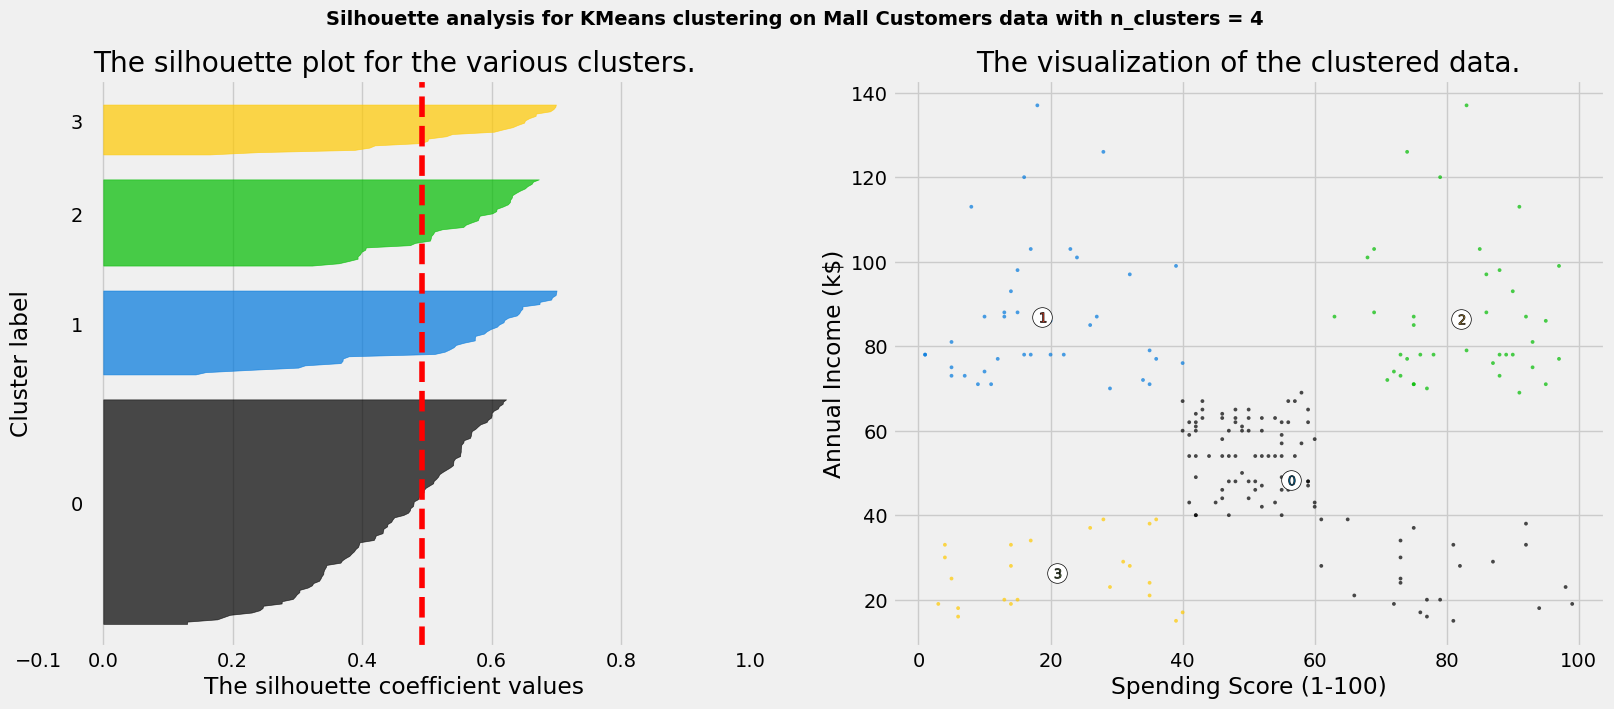

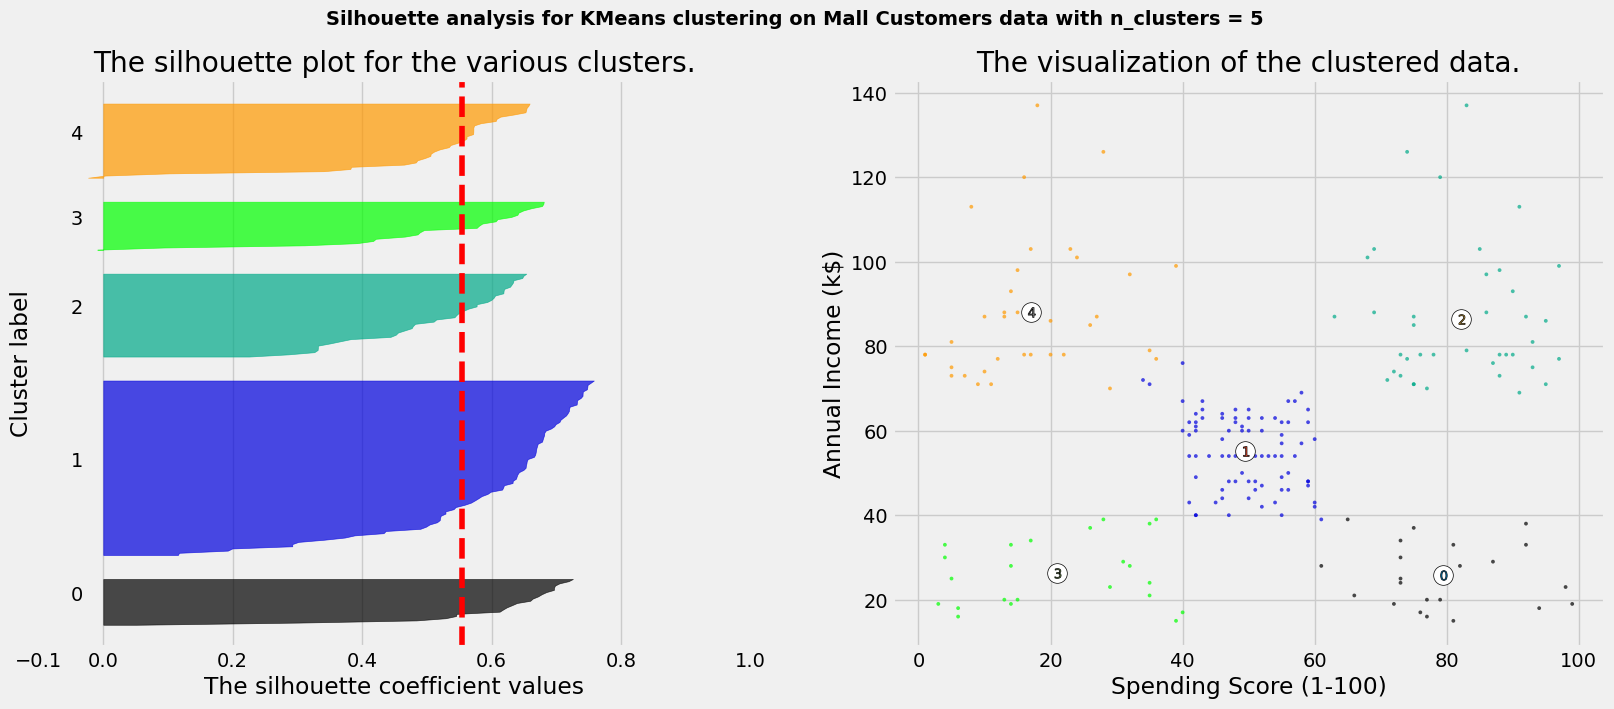

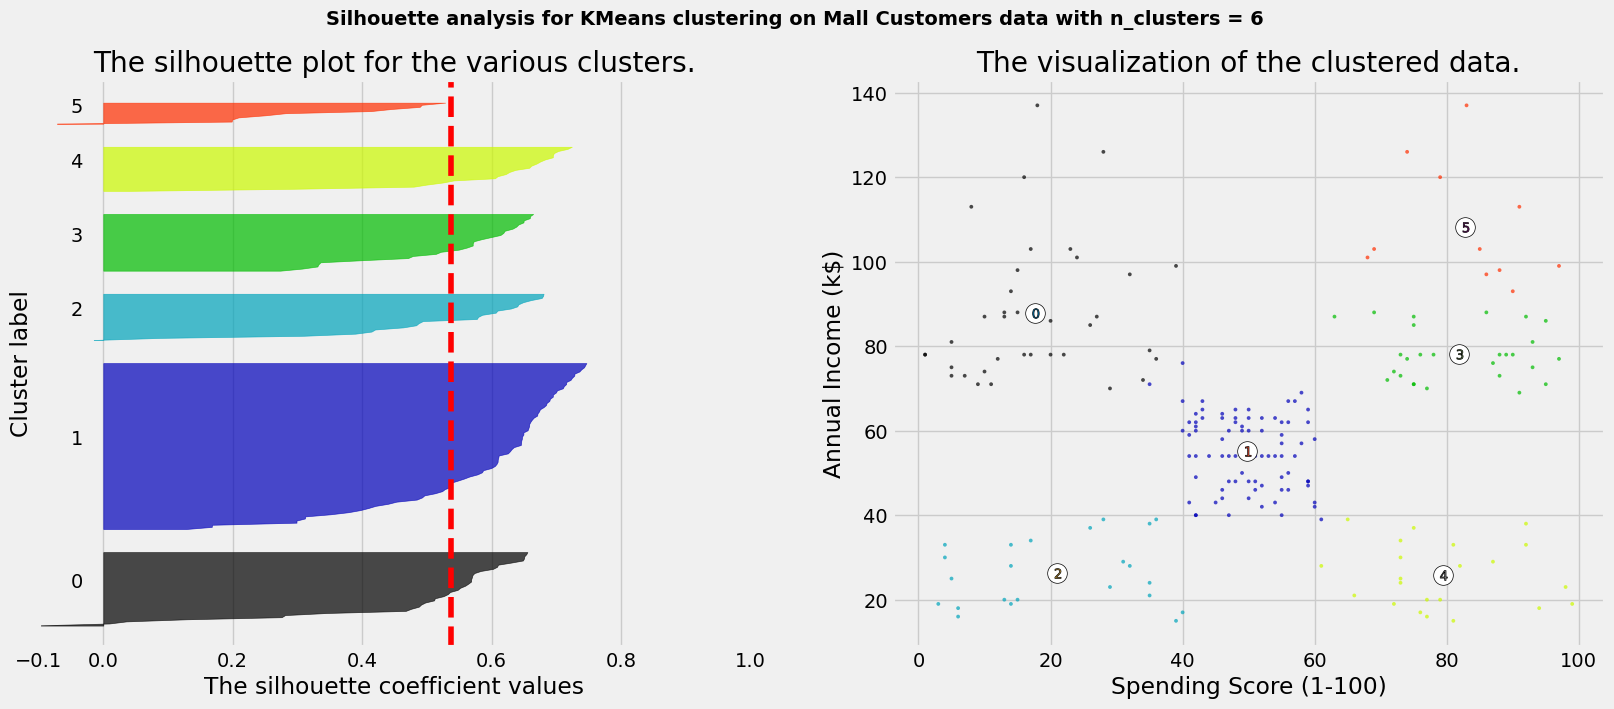

In [25]:
# Perform silhouette analysis for each cluster number
for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(x) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(x)

    # Compute the silhouette score
    silhouette_avg = silhouette_score(x, cluster_labels)
    print("For n_clusters =", n_clusters, "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(x, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to cluster i
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        # Choose color for each cluster
        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10  # Space between clusters

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # Vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear y-axis labels/ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot: Actual clusters
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(x[:, 0], x[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k")

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    ax2.scatter(centers[:, 0], centers[:, 1], marker="o", c="white", alpha=1, s=200, edgecolor="k")

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Spending Score (1-100)")
    ax2.set_ylabel("Annual Income (k$)")

    plt.suptitle("Silhouette analysis for KMeans clustering on Mall Customers data with n_clusters = %d" % n_clusters,
                 fontsize=14, fontweight="bold")

plt.show()

- Annual Income vs Spending score

In [26]:
# Determine the optimal number of clusters based on the highest silhouette score
optimal_clusters = None
best_score = -1

for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(x)
    silhouette_avg = silhouette_score(x, cluster_labels)
    
    if silhouette_avg > best_score:
        best_score = silhouette_avg
        optimal_clusters = n_clusters

print("Optimal number of clusters based on silhouette score:", optimal_clusters)

Optimal number of clusters based on silhouette score: 5


In [28]:
# Perform KMeans clustering with the optimal number of clusters
kmeans_optimal = KMeans(n_clusters=optimal_clusters, random_state=10)
cluster_labels_optimal = kmeans_optimal.fit_predict(x)

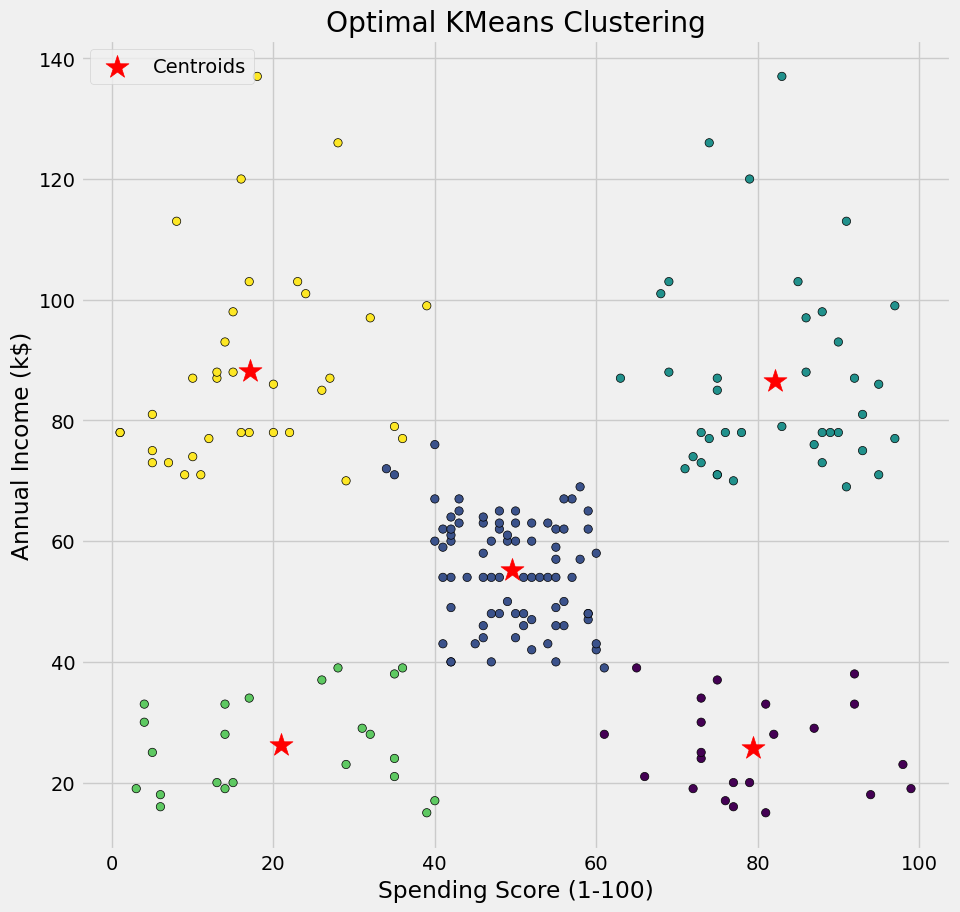

In [29]:
# Visualize the optimal clustering
plt.scatter(x[:, 0], x[:, 1], c=cluster_labels_optimal, cmap='viridis', marker='o', edgecolor='k')
plt.scatter(kmeans_optimal.cluster_centers_[:, 0], kmeans_optimal.cluster_centers_[:, 1], s=300, c='red', marker='*', label='Centroids')
plt.xlabel('Spending Score (1-100)')
plt.ylabel('Annual Income (k$)')
plt.title('Optimal KMeans Clustering')
plt.legend()
plt.grid(True)
plt.show()

In [30]:
# Perform silhouette analysis for each cluster number for Annual Income versus Age
x_age = df.loc[:, ['Age', 'Annual Income (k$)']].values

In [32]:
range_n_clusters_age = [2, 3, 4, 5, 6]

For n_clusters = 2 The average silhouette_score is : 0.42620850066216065
For n_clusters = 3 The average silhouette_score is : 0.4254725038202792
For n_clusters = 4 The average silhouette_score is : 0.43295184273333076
For n_clusters = 5 The average silhouette_score is : 0.40157587536205724
For n_clusters = 6 The average silhouette_score is : 0.3959805131239844


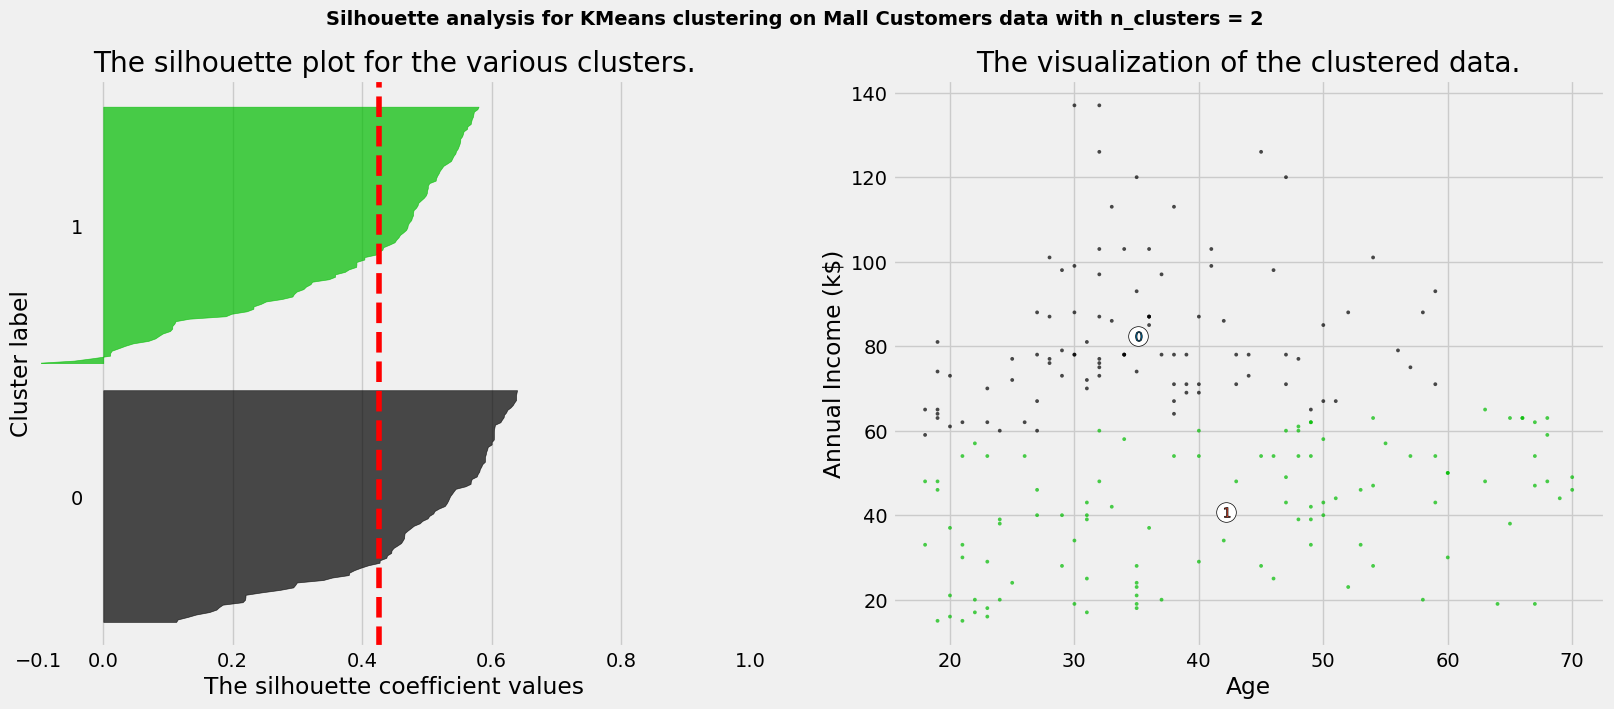

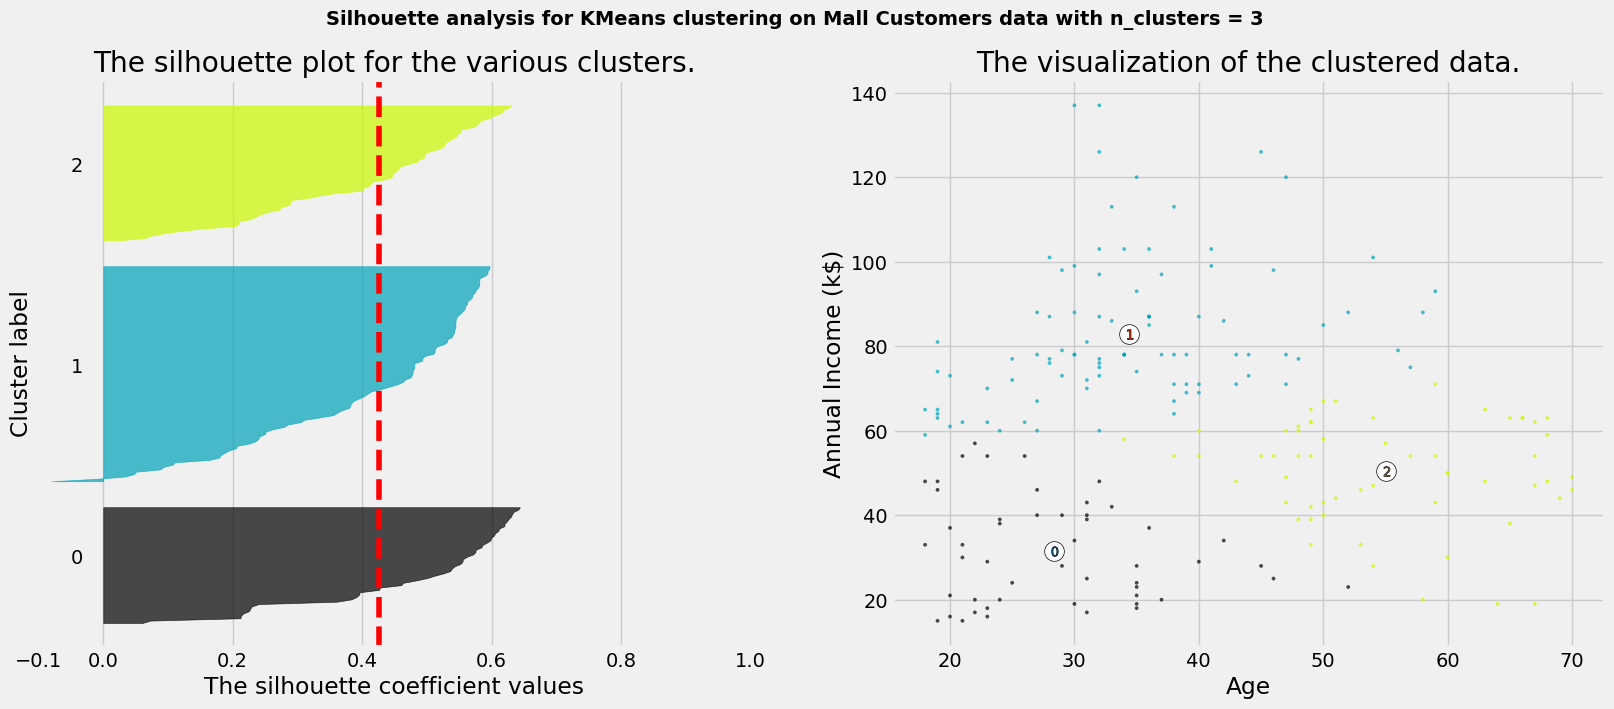

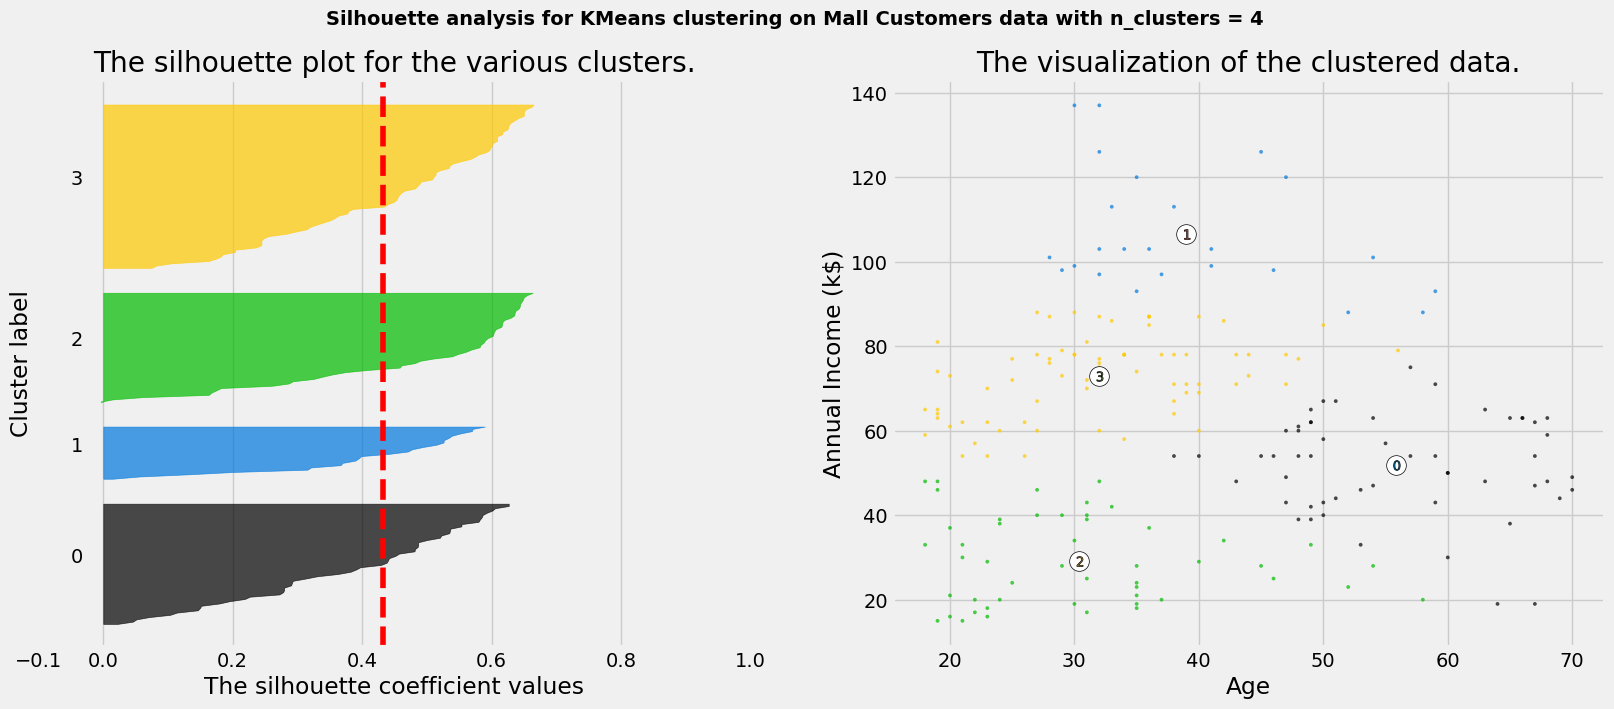

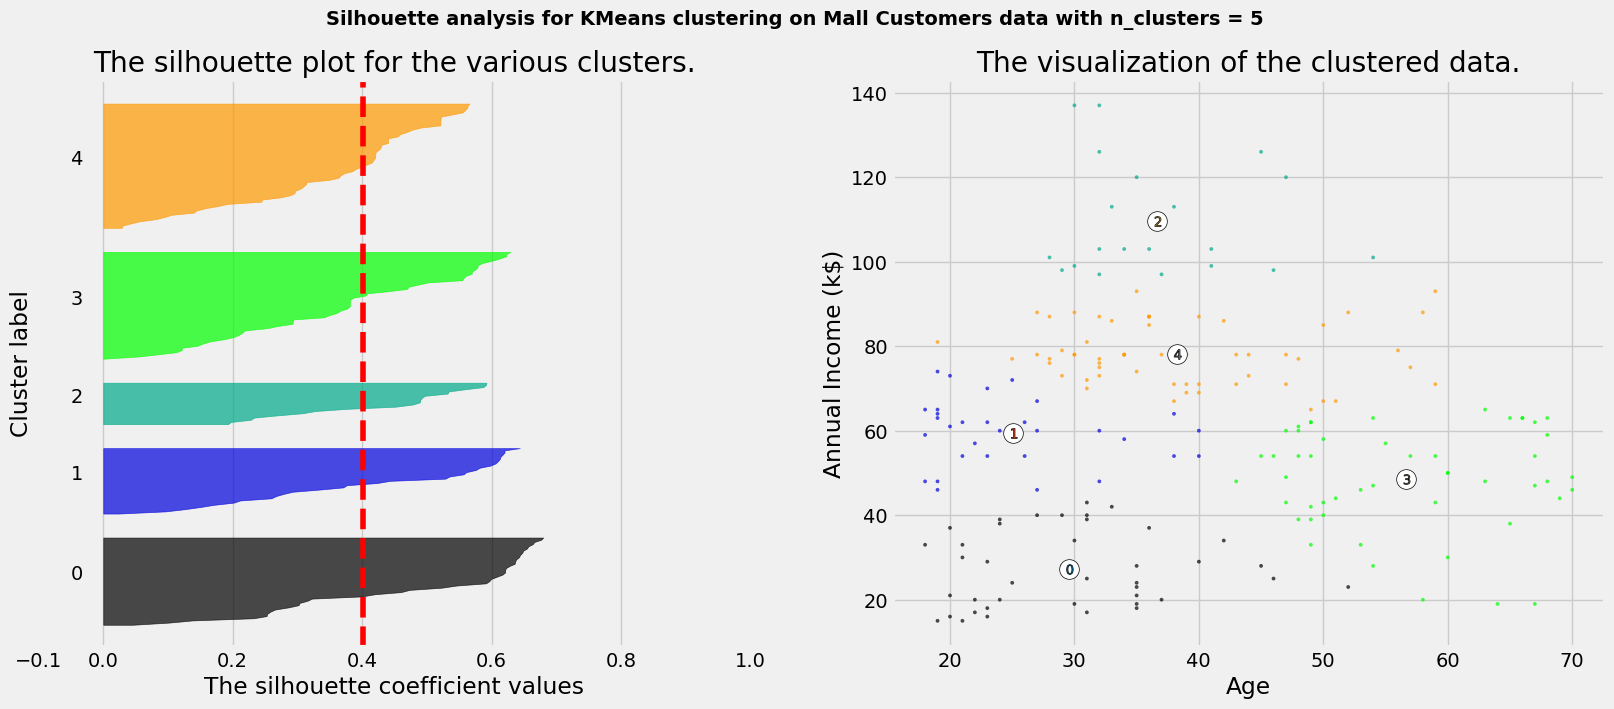

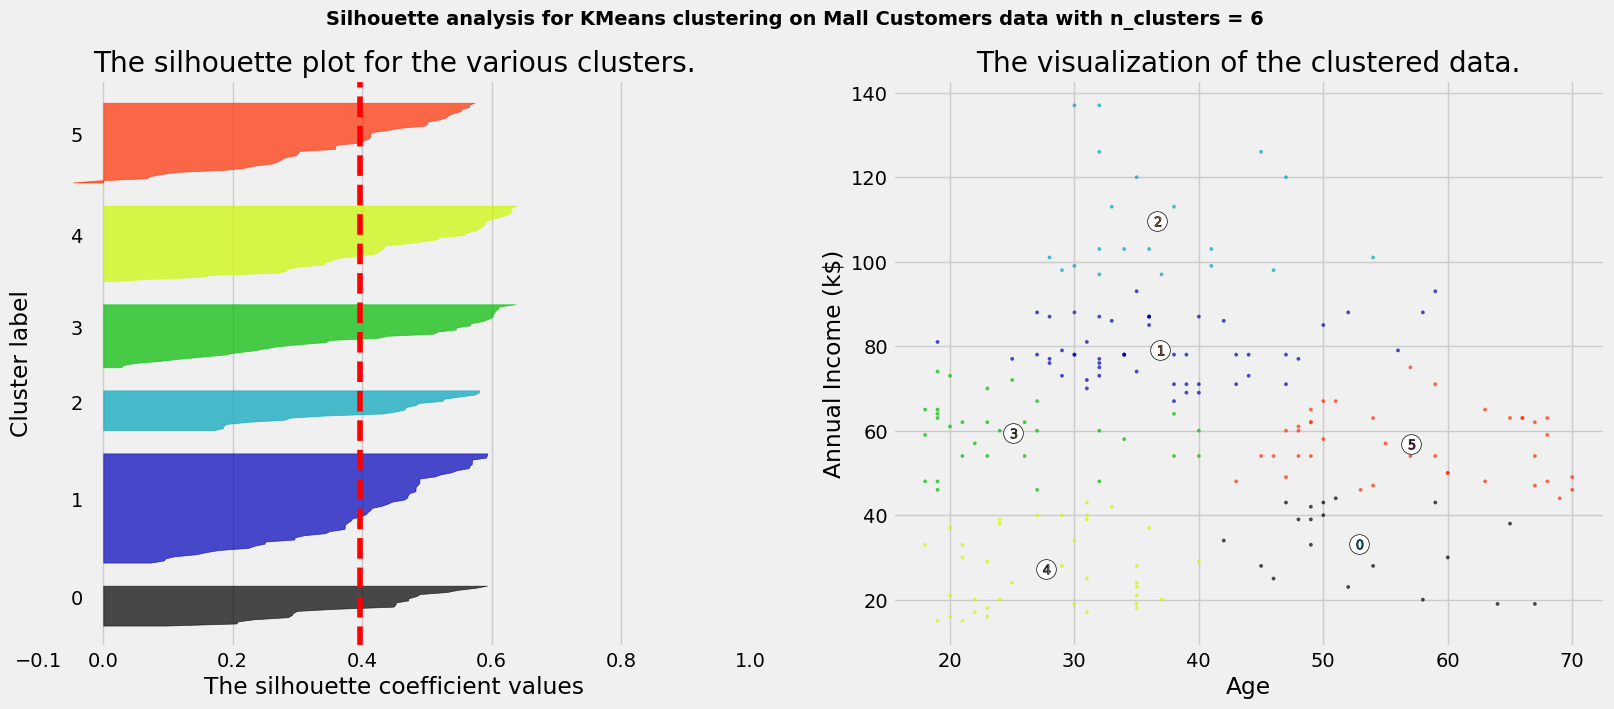

In [33]:
for n_clusters in range_n_clusters_age:
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(x_age) + (n_clusters + 1) * 10])

    clusterer_age = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels_age = clusterer_age.fit_predict(x_age)

    silhouette_avg_age = silhouette_score(x_age, cluster_labels_age)
    print("For n_clusters =", n_clusters, "The average silhouette_score is :", silhouette_avg_age)

    sample_silhouette_values_age = silhouette_samples(x_age, cluster_labels_age)

    y_lower_age = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values_age = sample_silhouette_values_age[cluster_labels_age == i]
        ith_cluster_silhouette_values_age.sort()
        size_cluster_i_age = ith_cluster_silhouette_values_age.shape[0]
        y_upper_age = y_lower_age + size_cluster_i_age

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower_age, y_upper_age), 0, ith_cluster_silhouette_values_age,
                          facecolor=color, edgecolor=color, alpha=0.7)

        ax1.text(-0.05, y_lower_age + 0.5 * size_cluster_i_age, str(i))
        y_lower_age = y_upper_age + 10  

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    ax1.axvline(x=silhouette_avg_age, color="red", linestyle="--")

    ax1.set_yticks([])
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    colors_age = cm.nipy_spectral(cluster_labels_age.astype(float) / n_clusters)
    ax2.scatter(x_age[:, 0], x_age[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors_age, edgecolor="k")

    centers_age = clusterer_age.cluster_centers_
    ax2.scatter(centers_age[:, 0], centers_age[:, 1], marker="o", c="white", alpha=1, s=200, edgecolor="k")

    for i, c in enumerate(centers_age):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Age")
    ax2.set_ylabel("Annual Income (k$)")

    plt.suptitle("Silhouette analysis for KMeans clustering on Mall Customers data with n_clusters = %d" % n_clusters,
                 fontsize=14, fontweight="bold")

plt.show()

In [34]:
# Determine the optimal number of clusters based on the highest silhouette score for Annual Income versus Age
optimal_clusters_age = None
best_score_age = -1

for n_clusters in range_n_clusters_age:
    clusterer_age = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels_age = clusterer_age.fit_predict(x_age)
    silhouette_avg_age = silhouette_score(x_age, cluster_labels_age)
    
    if silhouette_avg_age > best_score_age:
        best_score_age = silhouette_avg_age
        optimal_clusters_age = n_clusters

print("Optimal number of clusters based on silhouette score for Annual Income versus Age:", optimal_clusters_age)

Optimal number of clusters based on silhouette score for Annual Income versus Age: 4


In [36]:
# Perform KMeans clustering with the optimal number of clusters for Annual Income versus Age
kmeans_optimal_age = KMeans(n_clusters=optimal_clusters_age, random_state=10)
cluster_labels_optimal_age = kmeans_optimal_age.fit_predict(x_age)

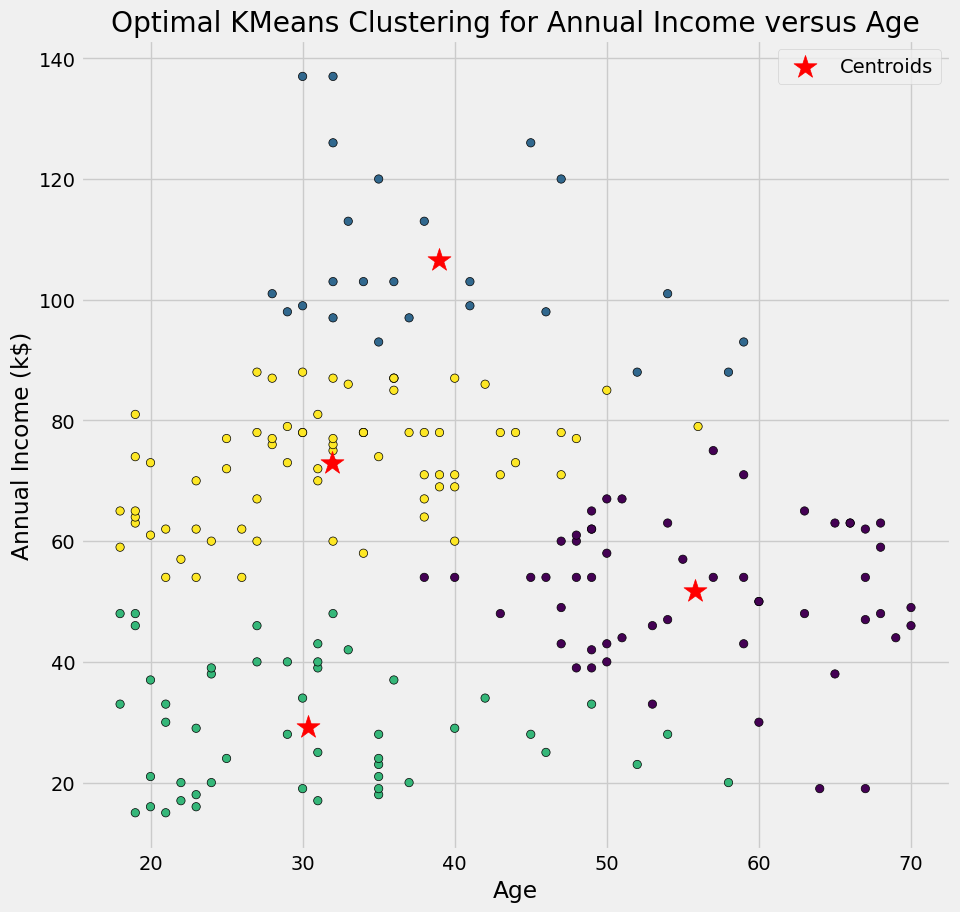

In [37]:
# Visualize the optimal clustering for Annual Income versus Age
plt.scatter(x_age[:, 0], x_age[:, 1], c=cluster_labels_optimal_age, cmap='viridis', marker='o', edgecolor='k')
plt.scatter(kmeans_optimal_age.cluster_centers_[:, 0], kmeans_optimal_age.cluster_centers_[:, 1], s=300, c='red', marker='*', label='Centroids')
plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')
plt.title('Optimal KMeans Clustering for Annual Income versus Age')
plt.legend()
plt.grid(True)
plt.show()

For n_clusters = 2 The average silhouette_score is : 0.4692341232501655
For n_clusters = 3 The average silhouette_score is : 0.45300127016521263
For n_clusters = 4 The average silhouette_score is : 0.49973941540141753
For n_clusters = 5 The average silhouette_score is : 0.46553524067755037
For n_clusters = 6 The average silhouette_score is : 0.4376185638584134


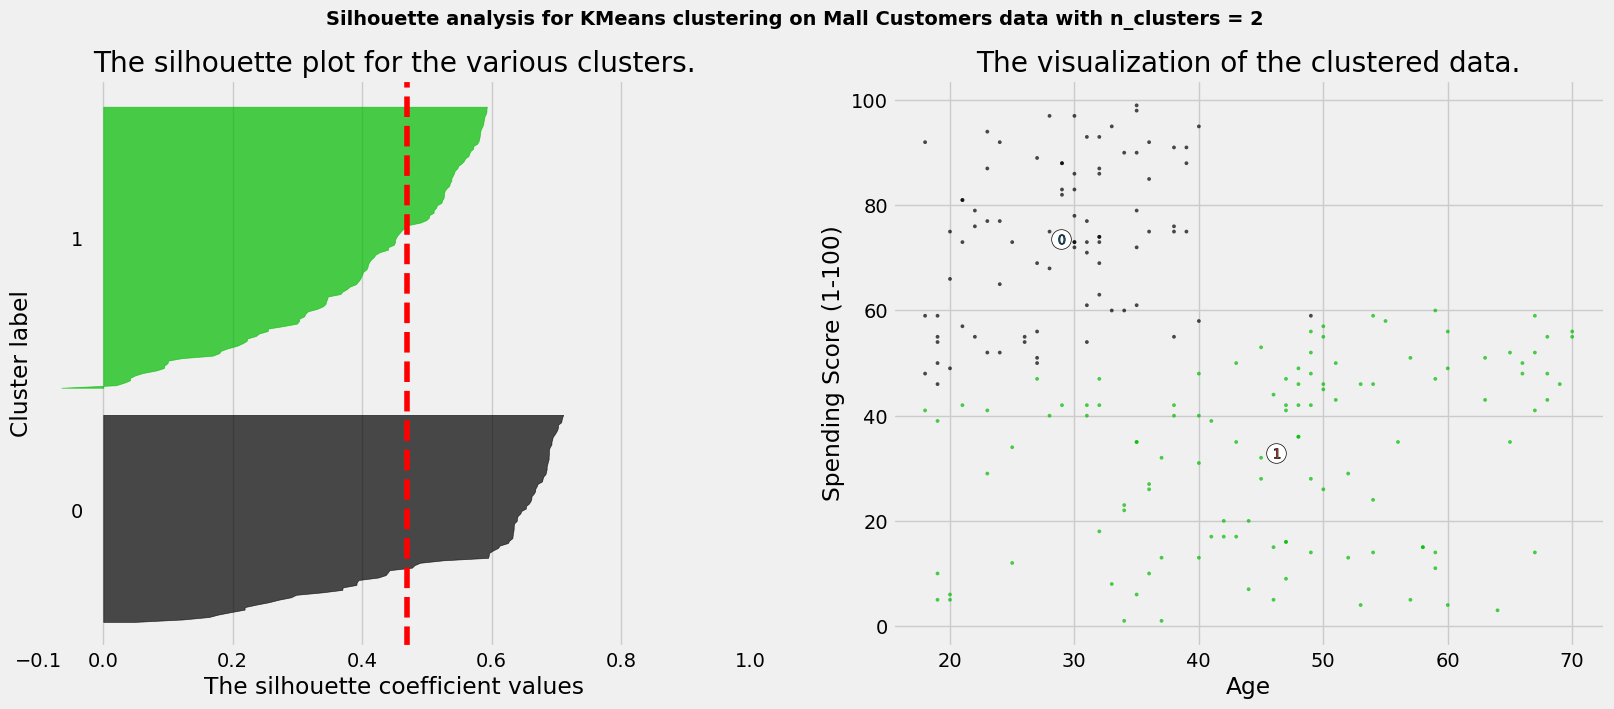

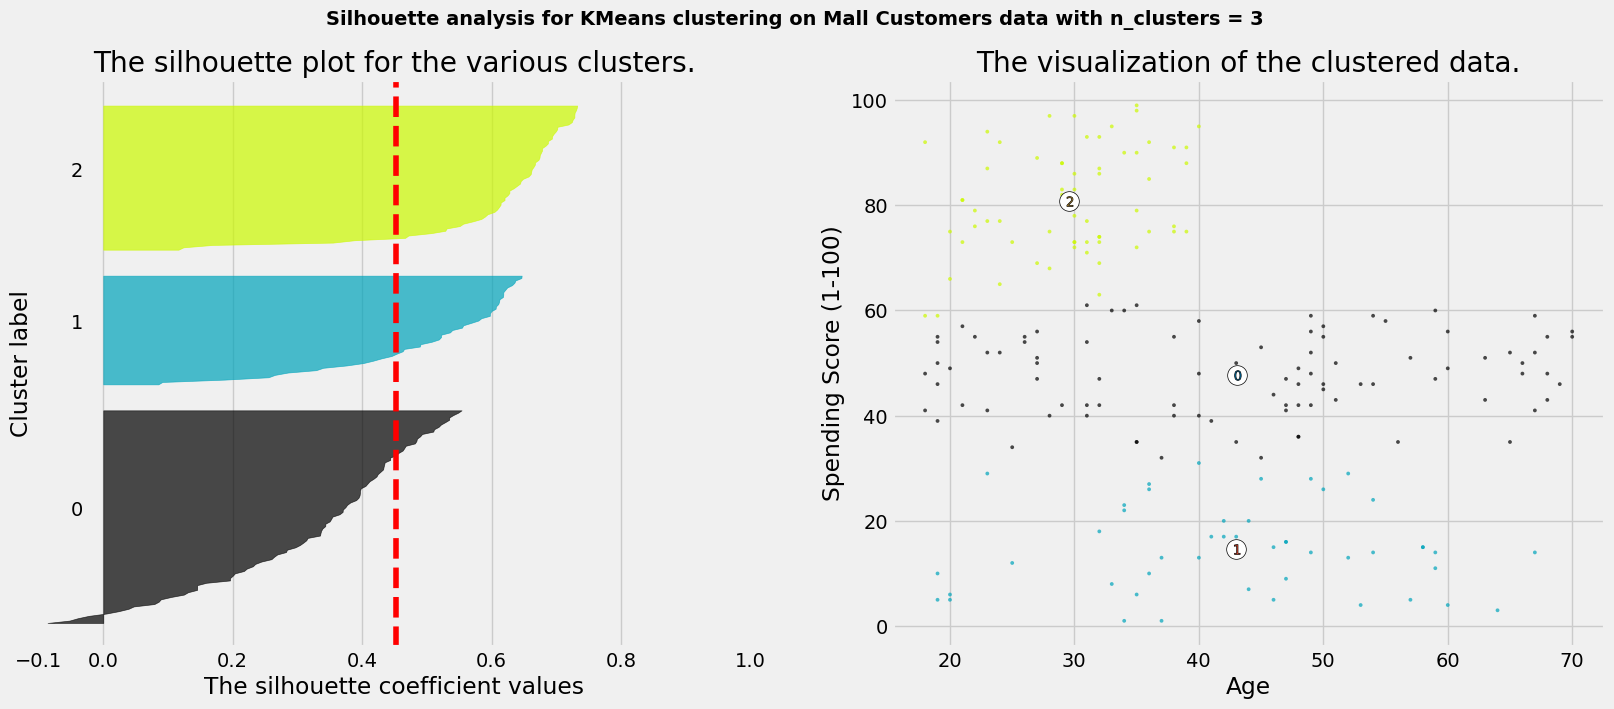

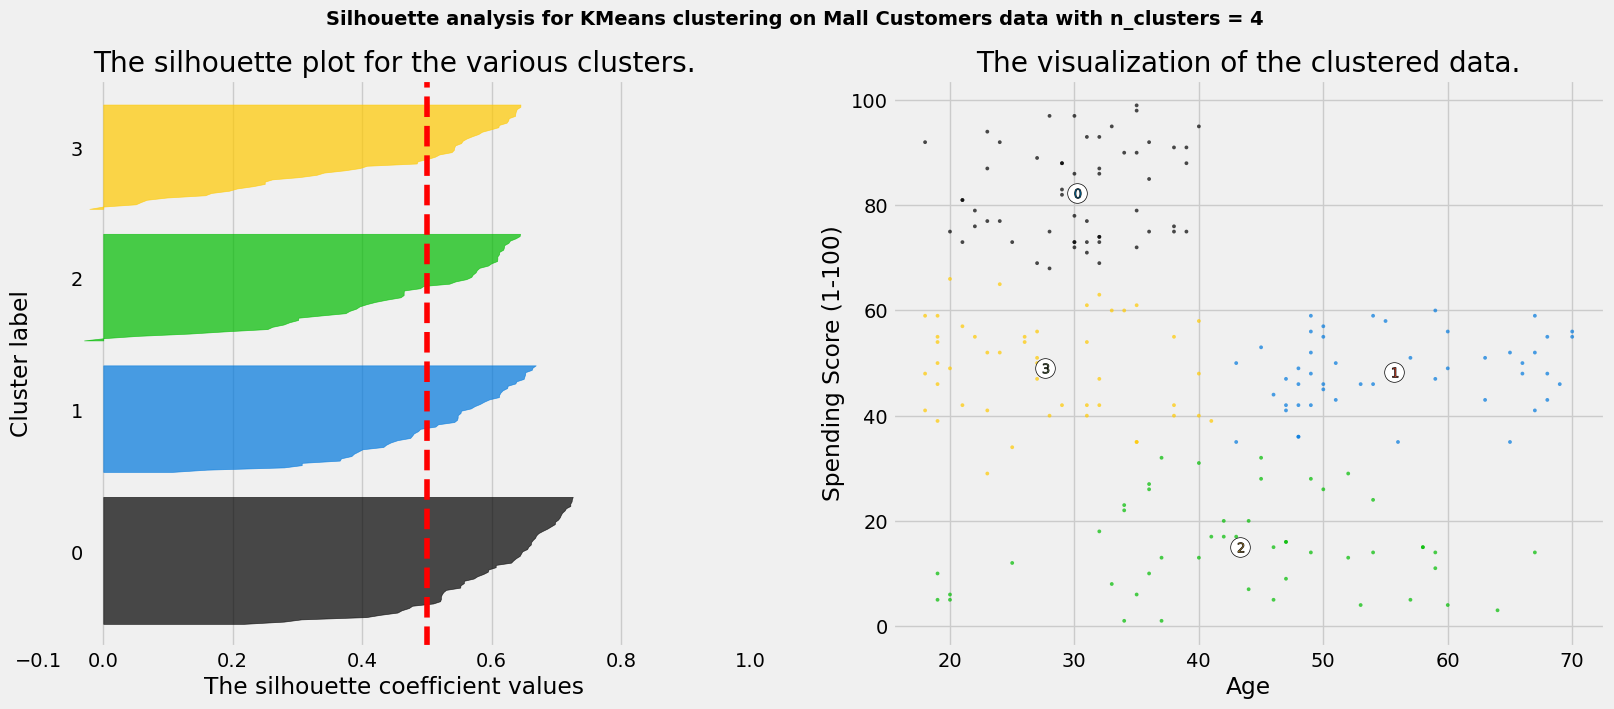

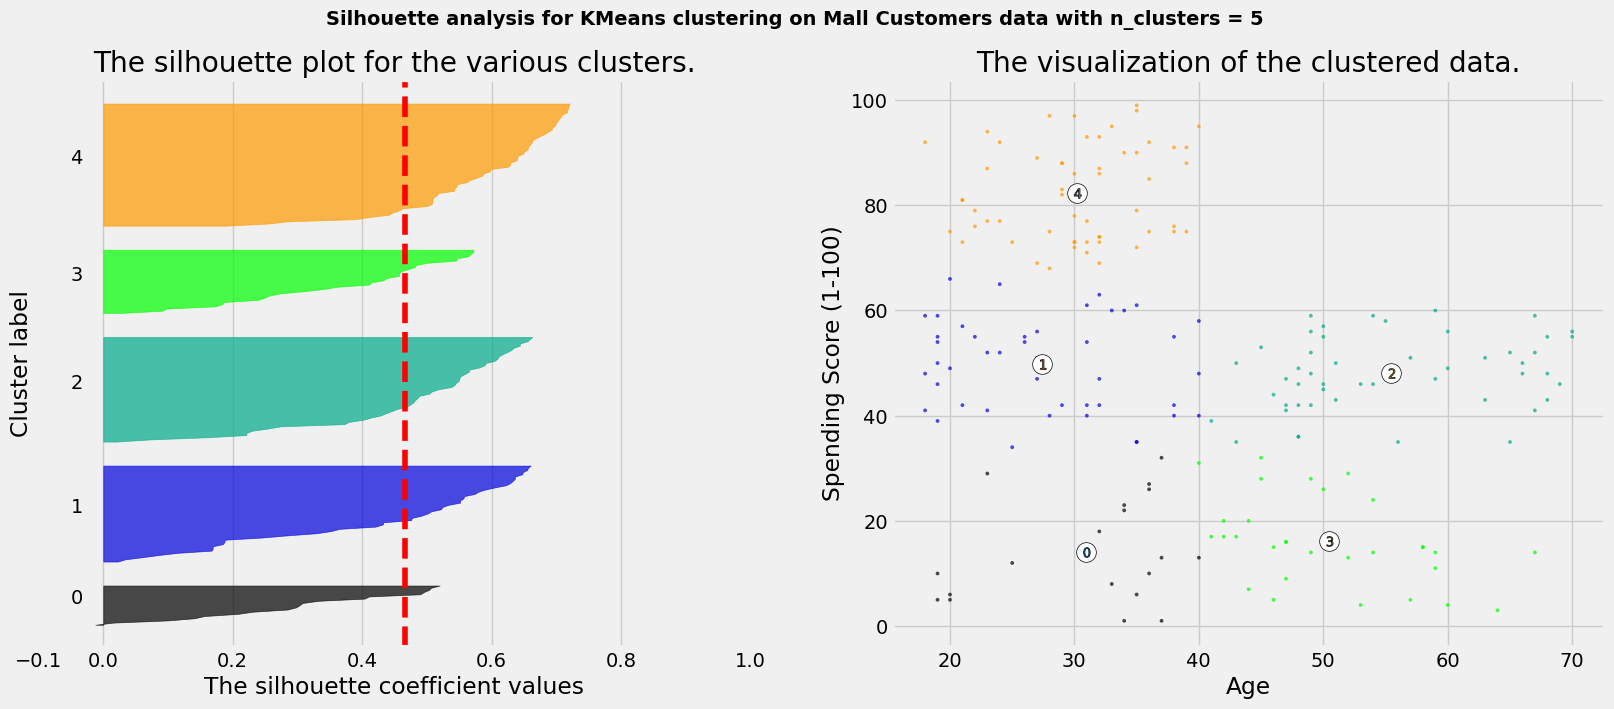

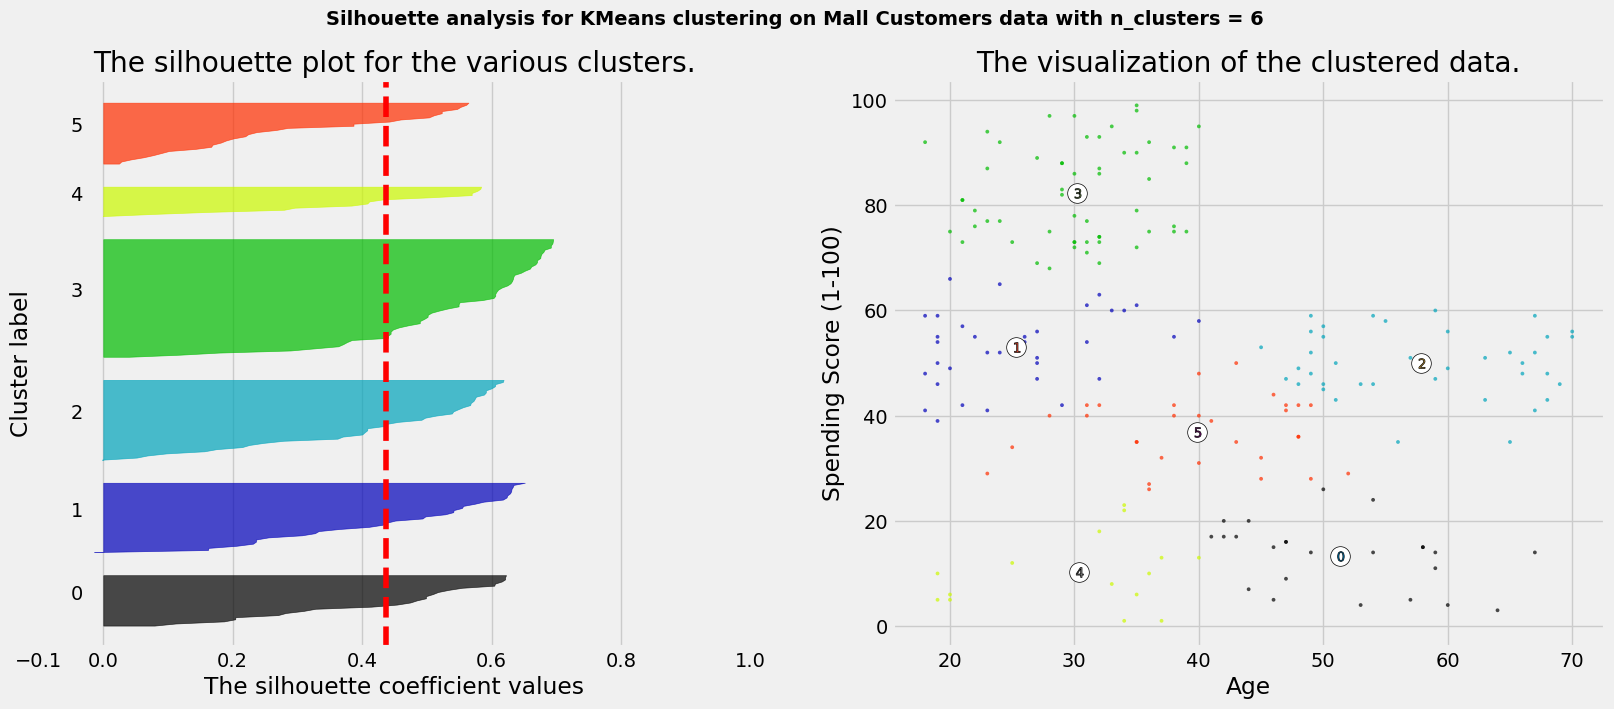

In [42]:
# Silhouette analysis for age versus spending score
range_n_clusters_age_spending = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters_age_spending:
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(x_age_spending) + (n_clusters + 1) * 10])

    clusterer_age_spending = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels_age_spending = clusterer_age_spending.fit_predict(x_age_spending)

    silhouette_avg_age_spending = silhouette_score(x_age_spending, cluster_labels_age_spending)
    print("For n_clusters =", n_clusters, "The average silhouette_score is :", silhouette_avg_age_spending)

    sample_silhouette_values_age_spending = silhouette_samples(x_age_spending, cluster_labels_age_spending)

    y_lower_age_spending = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values_age_spending = sample_silhouette_values_age_spending[cluster_labels_age_spending == i]
        ith_cluster_silhouette_values_age_spending.sort()
        size_cluster_i_age_spending = ith_cluster_silhouette_values_age_spending.shape[0]
        y_upper_age_spending = y_lower_age_spending + size_cluster_i_age_spending

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower_age_spending, y_upper_age_spending), 0, ith_cluster_silhouette_values_age_spending,
                          facecolor=color, edgecolor=color, alpha=0.7)

        ax1.text(-0.05, y_lower_age_spending + 0.5 * size_cluster_i_age_spending, str(i))
        y_lower_age_spending = y_upper_age_spending + 10  

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    ax1.axvline(x=silhouette_avg_age_spending, color="red", linestyle="--")

    ax1.set_yticks([])
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    colors_age_spending = cm.nipy_spectral(cluster_labels_age_spending.astype(float) / n_clusters)
    ax2.scatter(x_age_spending[:, 0], x_age_spending[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors_age_spending, edgecolor="k")

    centers_age_spending = clusterer_age_spending.cluster_centers_
    ax2.scatter(centers_age_spending[:, 0], centers_age_spending[:, 1], marker="o", c="white", alpha=1, s=200, edgecolor="k")

    for i, c in enumerate(centers_age_spending):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Age")
    ax2.set_ylabel("Spending Score (1-100)")

    plt.suptitle("Silhouette analysis for KMeans clustering on Mall Customers data with n_clusters = %d" % n_clusters,
                 fontsize=14, fontweight="bold")

plt.show()

In [43]:
# Determine the optimal number of clusters based on the highest silhouette score
optimal_clusters_age_spending = None
best_score_age_spending = -1

for n_clusters in range_n_clusters_age_spending:
    clusterer_age_spending = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels_age_spending = clusterer_age_spending.fit_predict(x_age_spending)
    silhouette_avg_age_spending = silhouette_score(x_age_spending, cluster_labels_age_spending)
    
    if silhouette_avg_age_spending > best_score_age_spending:
        best_score_age_spending = silhouette_avg_age_spending
        optimal_clusters_age_spending = n_clusters

print("Optimal number of clusters based on silhouette score for age versus spending score:", optimal_clusters_age_spending)

Optimal number of clusters based on silhouette score for age versus spending score: 4


In [44]:
# Perform KMeans clustering with the optimal number of clusters
kmeans_optimal_age_spending = KMeans(n_clusters=optimal_clusters_age_spending, random_state=10)
cluster_labels_optimal_age_spending = kmeans_optimal_age_spending.fit_predict(x_age_spending)


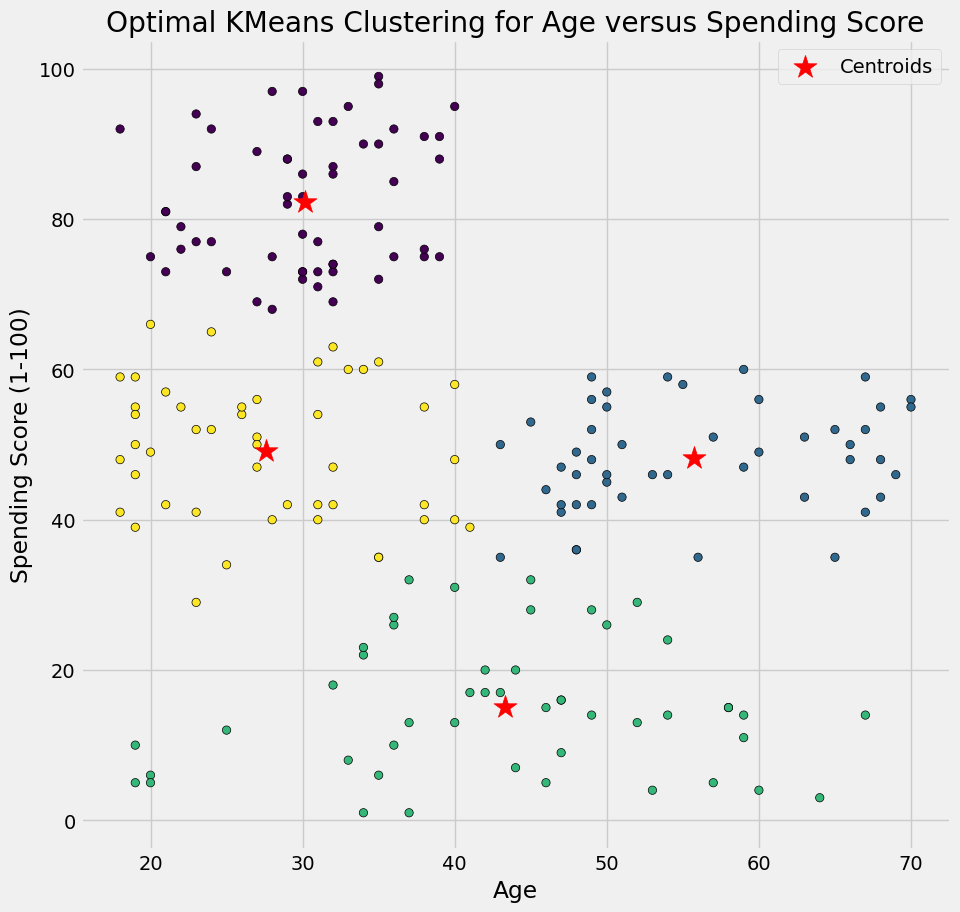

In [45]:
# Visualize the optimal clustering for age versus spending score
plt.scatter(x_age_spending[:, 0], x_age_spending[:, 1], c=cluster_labels_optimal_age_spending, cmap='viridis', marker='o', edgecolor='k')
plt.scatter(kmeans_optimal_age_spending.cluster_centers_[:, 0], kmeans_optimal_age_spending.cluster_centers_[:, 1], s=300, c='red', marker='*', label='Centroids')
plt.title('Optimal KMeans Clustering for Age versus Spending Score')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.grid(True)
plt.show()

#### Summary

- Spending Score vs Annual Income: 5 clusters
- Annual Income vs Spending Score: 4 clusters
- Age vs Spending Score: 4 clusters